In [22]:
import numpy as np
import pandas as pd

In [23]:
from datetime import date, timedelta
import yfinance as yf

today = date.today()
end_date = today.strftime("%Y-%m-%d")
d1 = date.today() - timedelta(days=360*10) 
start_date = d1.strftime("%Y-%m-%d")

df = yf.download(tickers = 'AAPL',start = start_date,end = end_date)
df= pd.DataFrame(df)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-29,15.742857,16.071072,15.721429,15.992500,13.884642,248057600
1,2013-07-30,16.070000,16.326786,16.043928,16.190001,14.056110,309422400
2,2013-07-31,16.249643,16.333570,16.051071,16.161785,14.031615,322957600
3,2013-08-01,16.276787,16.314285,16.187857,16.309999,14.160290,206250800
4,2013-08-02,16.357500,16.530357,16.309286,16.519285,14.341991,274783600


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2481 non-null   datetime64[ns]
 1   Open       2481 non-null   float64       
 2   High       2481 non-null   float64       
 3   Low        2481 non-null   float64       
 4   Close      2481 non-null   float64       
 5   Adj Close  2481 non-null   float64       
 6   Volume     2481 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.8 KB


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000,2.481000e+03
mean,69.074959,69.855673,68.338200,69.131401,67.261466,1.505467e+08
std,51.199032,51.857906,50.583793,51.253567,51.750204,9.676001e+07
min,15.742857,16.071072,15.721429,15.992500,13.884642,3.519590e+07
25%,28.350000,28.587500,28.070000,28.362499,25.932632,8.696030e+07
50%,43.810001,44.299999,43.622501,43.955002,42.023849,1.211120e+08
75%,122.589996,123.870003,120.550003,122.250000,120.530434,1.838572e+08
max,182.630005,184.949997,179.259995,182.009995,180.949997,1.065523e+09


[]

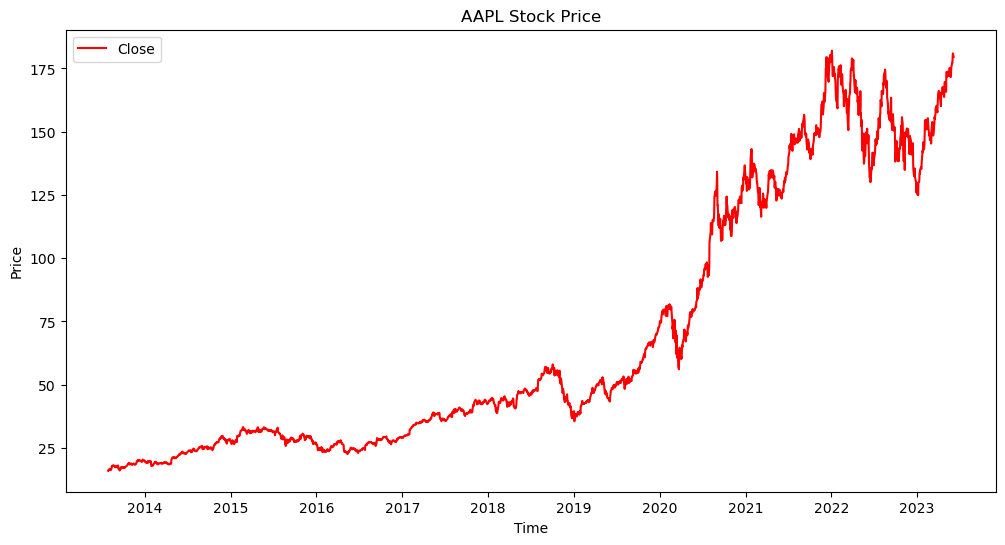

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close,'r',label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock Price')
plt.legend()
plt.plot()

In [28]:
batch = []
data = df.Close
for i in range(128,len(df)):
    batch.append(data[i-128:i])
batch = np.array(batch)

In [29]:
batch.shape,batch

((2353, 128),
 array([[ 15.99250031,  16.19000053,  16.16178513, ...,  19.6607132 ,
          18.0892868 ,  17.8839283 ],
        [ 16.19000053,  16.16178513,  16.30999947, ...,  18.0892868 ,
          17.8839283 ,  17.84928513],
        [ 16.16178513,  16.30999947,  16.5192852 , ...,  17.8839283 ,
          17.84928513,  17.87857056],
        ...,
        [148.11000061, 144.22000122, 141.16999817, ..., 175.42999268,
         177.30000305, 177.25      ],
        [144.22000122, 141.16999817, 148.02999878, ..., 177.30000305,
         177.25      , 180.08999634],
        [141.16999817, 148.02999878, 148.30999756, ..., 177.25      ,
         180.08999634, 180.94999695]]))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

In [31]:
batch1 = scaler.fit_transform(np.array(batch[0]).reshape(-1,1)).reshape(-1)

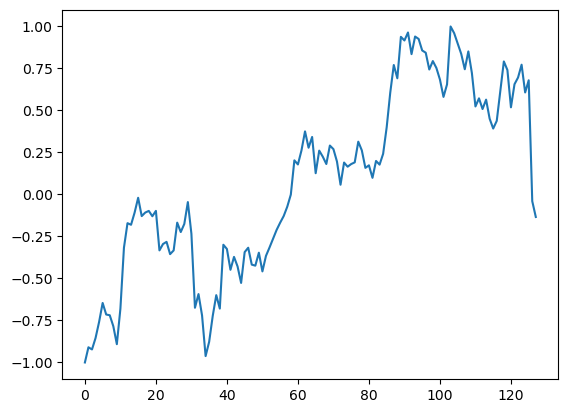

In [32]:
plt.plot(batch1)
plt.show()

In [33]:
from scipy.fft import fft,fftfreq

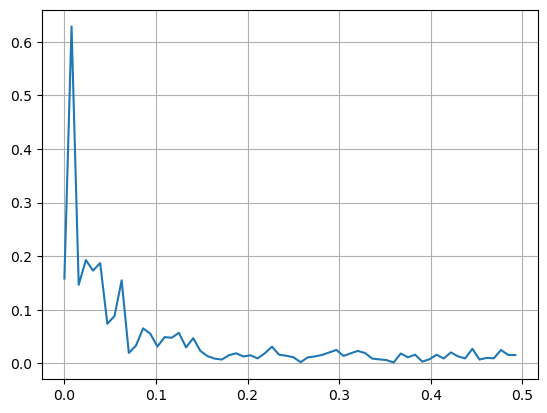

In [34]:
yf = fft(batch1)
yf1 = 2.0/len(batch1) * np.abs(yf[0:len(batch1)//2])
xf = fftfreq(len(batch1),1)[:len(batch1)//2]
plt.plot(xf,yf1 )
plt.grid()
plt.show()

In [35]:
np.array((xf,yf[0:len(batch1)//2].real,yf[0:len(batch1)//2].imag)).T

array([[ 0.00000000e+00,  1.01360480e+01, -0.00000000e+00],
       [ 7.81250000e-03, -1.47874718e+00,  4.02171209e+01],
       [ 1.56250000e-02, -7.13909804e+00,  6.09853123e+00],
       [ 2.34375000e-02, -1.22650125e+01,  1.38604569e+00],
       [ 3.12500000e-02, -5.52909792e-01,  1.10671817e+01],
       [ 3.90625000e-02, -5.83799263e+00,  1.04667900e+01],
       [ 4.68750000e-02,  1.06492106e+00,  4.60779176e+00],
       [ 5.46875000e-02, -2.06293271e+00,  5.26946241e+00],
       [ 6.25000000e-02, -3.78648571e+00,  9.17453381e+00],
       [ 7.03125000e-02, -1.17089982e+00,  4.49123472e-01],
       [ 7.81250000e-02,  1.06924893e-01, -2.11677800e+00],
       [ 8.59375000e-02, -4.15163421e+00, -5.21043188e-01],
       [ 9.37500000e-02, -2.82650201e+00,  2.15162792e+00],
       [ 1.01562500e-01, -1.80572006e-01,  2.00399143e+00],
       [ 1.09375000e-01, -3.13354582e+00,  1.21645212e-01],
       [ 1.17187500e-01, -3.01626002e+00, -5.39573491e-01],
       [ 1.25000000e-01, -2.04448290e+00

In [36]:
def transformation(fft_data,isPlot=False):
    scaler = MinMaxScaler(feature_range=(-1,1))
    batch1 = scaler.fit_transform(np.array(fft_data).reshape(-1,1)).reshape(-1)
    yf = fft(batch1)
    yf1 = 2.0/len(batch1) * np.abs(yf[0:len(batch1)//2])
    xf = fftfreq(len(batch1),1)[:len(batch1)//2]
    # if isPlot:
    #     plt.plot(batch1)
    #     plt.show()
    #     plt.plot(xf,yf1)
    #     plt.grid()
    #     plt.show()
    return np.array((xf,yf[0:len(batch1)//2].real,yf[0:len(batch1)//2].imag)).T

In [37]:
transformation(batch[0])

array([[ 0.00000000e+00,  1.01360480e+01, -0.00000000e+00],
       [ 7.81250000e-03, -1.47874718e+00,  4.02171209e+01],
       [ 1.56250000e-02, -7.13909804e+00,  6.09853123e+00],
       [ 2.34375000e-02, -1.22650125e+01,  1.38604569e+00],
       [ 3.12500000e-02, -5.52909792e-01,  1.10671817e+01],
       [ 3.90625000e-02, -5.83799263e+00,  1.04667900e+01],
       [ 4.68750000e-02,  1.06492106e+00,  4.60779176e+00],
       [ 5.46875000e-02, -2.06293271e+00,  5.26946241e+00],
       [ 6.25000000e-02, -3.78648571e+00,  9.17453381e+00],
       [ 7.03125000e-02, -1.17089982e+00,  4.49123472e-01],
       [ 7.81250000e-02,  1.06924893e-01, -2.11677800e+00],
       [ 8.59375000e-02, -4.15163421e+00, -5.21043188e-01],
       [ 9.37500000e-02, -2.82650201e+00,  2.15162792e+00],
       [ 1.01562500e-01, -1.80572006e-01,  2.00399143e+00],
       [ 1.09375000e-01, -3.13354582e+00,  1.21645212e-01],
       [ 1.17187500e-01, -3.01626002e+00, -5.39573491e-01],
       [ 1.25000000e-01, -2.04448290e+00

In [38]:
transformed_data = [transformation(i) for i in batch]

In [39]:
transformed_data = np.array(transformed_data)

In [40]:
transformed_data.shape

(2353, 64, 3)

In [41]:
# import tensorflow as tf
# tf.debugging.set_log_device_placement(True)

In [42]:
# import keras
# config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
# sess = tf.compat.v1.Session(config=config) 
# keras.backend.set_session(sess)

In [43]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [44]:
y = []
for i in range(128,len(df)):
    y.append(data[i])
y=np.array(y)

In [45]:
(transformed_data.shape[1],transformed_data.shape[2])

(64, 3)

In [46]:
y.shape

(2353,)

In [47]:
model = Sequential()

model.add(LSTM(units=64,return_sequences=True,input_shape = (transformed_data.shape[1],transformed_data.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 64)            17408     
                                                                 
 dropout (Dropout)           (None, 64, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64, 128)           98816     
                                                                 
 dropout_2 (Dropout)         (None, 64, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64, 128)           1

In [49]:
model.compile(optimizer='adam',loss='mse')

In [53]:
transformed_data.shape,y.shape

((2353, 64, 3), (2353,))

In [50]:
model.fit(transformed_data,y,epochs=50)

Epoch 1/50
74/74 [==============================] - 12s 45ms/step - loss: 6998.2158
Epoch 2/50
74/74 [==============================] - 3s 43ms/step - loss: 6410.2573
Epoch 3/50
74/74 [==============================] - 3s 43ms/step - loss: 6091.5781
Epoch 4/50
74/74 [==============================] - 3s 45ms/step - loss: 5807.6694
Epoch 5/50
74/74 [==============================] - 3s 43ms/step - loss: 5547.1226
Epoch 6/50
74/74 [==============================] - 3s 43ms/step - loss: 5309.6294
Epoch 7/50
74/74 [==============================] - 3s 43ms/step - loss: 5082.3496
Epoch 8/50
74/74 [==============================] - 3s 44ms/step - loss: 4895.9546
Epoch 9/50
74/74 [==============================] - 3s 46ms/step - loss: 4688.2432
Epoch 10/50
74/74 [==============================] - 3s 45ms/step - loss: 4503.4893
Epoch 11/50
74/74 [==============================] - 3s 45ms/step - loss: 4327.7046
Epoch 12/50
74/74 [==============================] - 3s 45ms/step - loss: 4186.8862


In [29]:
model.save('fft_model.h5')

[*********************100%***********************]  1 of 1 completed


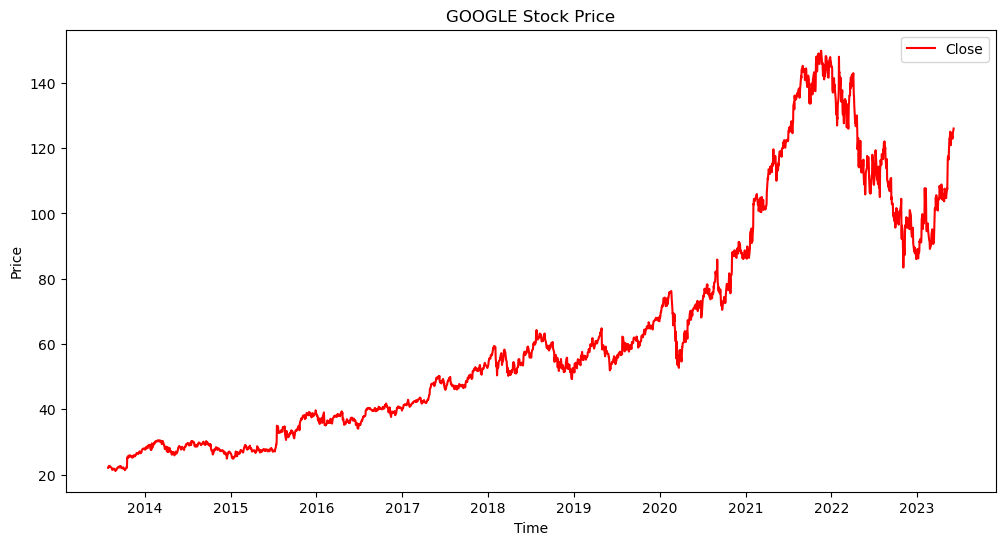

In [70]:
# from keras.models import load_model 
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import yfinance as yf
# from scipy.fft import fft,fftfreq

# from datetime import date, timedelta
# from sklearn.preprocessing import MinMaxScaler
# model = load_model('fft_model.h5')
# import yfinance as yf
today = date.today()
end_date = today.strftime("%Y-%m-%d")
d1 = date.today() - timedelta(days=360*10) 
start_date = d1.strftime("%Y-%m-%d")

df = yf.download(tickers = 'GOOGL',start = start_date,end = end_date)
df= pd.DataFrame(df)
df = df.reset_index()
# import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close,'r',label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('GOOGLE Stock Price')
plt.legend()
plt.plot()
plt.show()
batch = []
data = df.Close
for i in range(128,len(df)):
    batch.append(data[i-128:i])
batch = np.array(batch)
transformed_test_data = [transformation(i) for i in batch]
y = []
for i in range(128,len(df)):
    y.append(data[i])
y=np.array(y)

In [71]:
transformed_test_data = np.array(transformed_test_data)

In [51]:
predicted_y = model.predict(transformed_data)

74/74 [==============================] - 3s 20ms/step


In [54]:
predicted_y.shape

(2353, 1)

In [66]:
transformed_test_data.reshape(-1,64,3).shape

(2353, 64, 3)

In [72]:
predicted_y = model.predict(transformed_test_data.reshape(-1,64,3))
predicted_y.shape

74/74 [==============================] - 2s 21ms/step


(2353, 1)

In [73]:
predicted_y

array([[70.05942],
       [70.05942],
       [70.05942],
       ...,
       [70.05942],
       [70.05942],
       [70.05942]], dtype=float32)

[*********************100%***********************]  1 of 1 completed


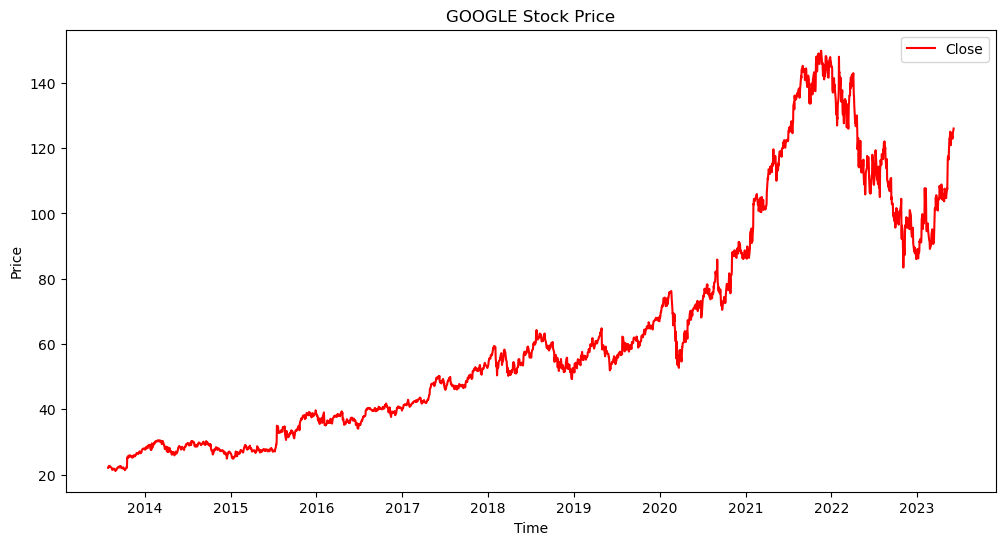

In [17]:

from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.fft import fft,fftfreq

from datetime import date, timedelta
from sklearn.preprocessing import MinMaxScaler
model = load_model('fft_model.h5')
import yfinance as yf
today = date.today()
end_date = today.strftime("%Y-%m-%d")
d1 = date.today() - timedelta(days=360*10)
start_date = d1.strftime("%Y-%m-%d")

df = yf.download(tickers = 'GOOGL',start = start_date,end = end_date)
df= pd.DataFrame(df)
df = df.reset_index()
import matplotlib.pyplot as plt
def transformation(fft_data,isPlot=False):
    scaler = MinMaxScaler(feature_range=(-1,1))
    batch1 = scaler.fit_transform(np.array(fft_data).reshape(-1,1)).reshape(-1)
    yf = fft(batch1)
    yf1 = 2.0/len(batch1) * np.abs(yf[0:len(batch1)//2])
    xf = fftfreq(len(batch1),1)[:len(batch1)//2]
    # if isPlot:
    #     plt.plot(batch1)
    #     plt.show()
    #     plt.plot(xf,yf1)
    #     plt.grid()
    #     plt.show()
    return np.array((xf,yf[0:len(batch1)//2].real,yf[0:len(batch1)//2].imag)).T

fig = plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close,'r',label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('GOOGLE Stock Price')
plt.legend()
plt.plot()
plt.show()
batch = []
data = df.Close
for i in range(128,len(df)):
    batch.append(data[i-128:i])
batch = np.array(batch)
transformed_test_data = [transformation(i) for i in batch]
y = []
for i in range(128,len(df)):
    y.append(data[i])
y=np.array(y)
transformed_data = np.array(transformed_test_data)


In [18]:
transformed_test_data = np.array(transformed_test_data)
transformed_test_data.shape

(2353, 64, 3)

ValueError: in user code:

    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rajab\.conda\envs\superbase\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 3), found shape=(32, 3)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 64)            17408     
                                                                 
 dropout (Dropout)           (None, 64, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64, 128)           98816     
                                                                 
 dropout_2 (Dropout)         (None, 64, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64, 128)           1

In [7]:
predicted_y.shape,y.shape

((2353, 1), (2353,))

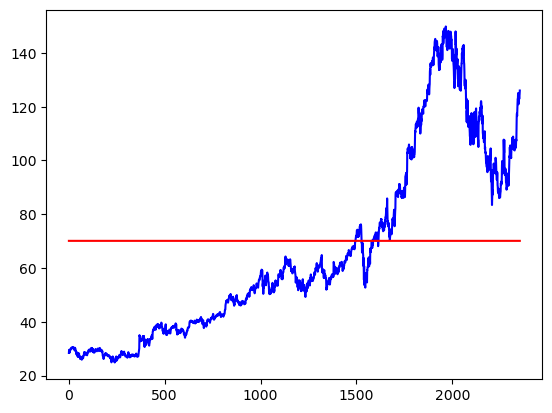

In [8]:
plt.plot(y,'b')
plt.plot(predicted_y,'r')
plt.show()